In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.drop(columns=['CustomerID'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
data.shape

(200, 4)

In [6]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
data.mean()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_2712\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [10]:
data.mode()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,32.0,54,42.0
1,NaN,NaN,78,NaN


In [11]:
data.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [12]:
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

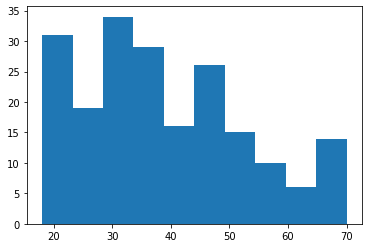

In [13]:
plt.hist(data['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

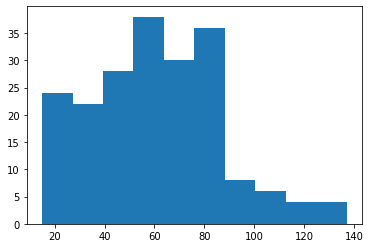

In [14]:
plt.hist(data['Annual Income (k$)'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

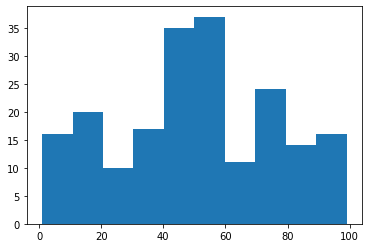

In [15]:
plt.hist(data['Spending Score (1-100)'])

<AxesSubplot: >

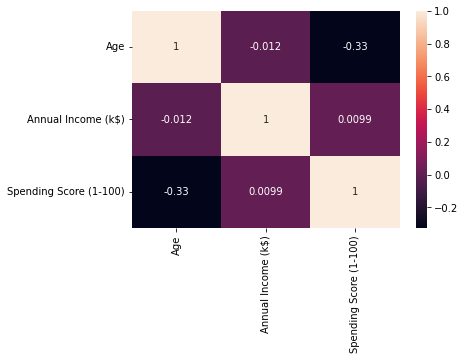

In [16]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot: >

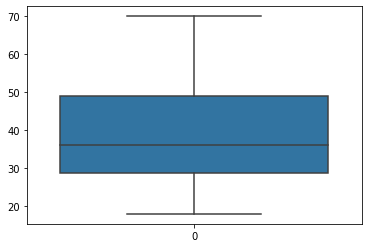

In [17]:
sns.boxplot(data['Age'])

<AxesSubplot: >

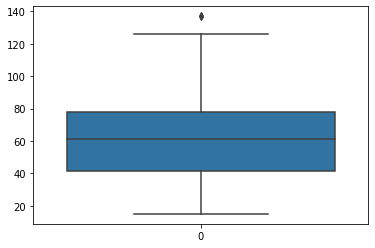

In [18]:
sns.boxplot(data['Annual Income (k$)'])

<AxesSubplot: >

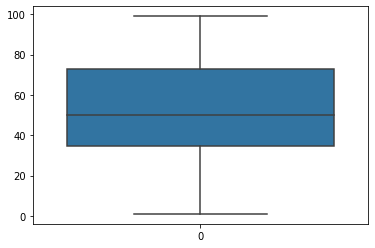

In [19]:
sns.boxplot(data['Spending Score (1-100)'])

In [20]:
qnt = data.quantile(q=[0.25, 0.75])
Q1 = qnt.iloc[0]
Q3 = qnt.iloc[1]
iqr = Q3 - Q1
print(iqr)
upper = qnt.iloc[1] + 1.5*iqr
print(upper)

Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64


In [21]:
data['Annual Income (k$)'] = np.where(data['Annual Income (k$)']>132.75, data['Annual Income (k$)'].mean(), data['Annual Income (k$)'])

<AxesSubplot: >

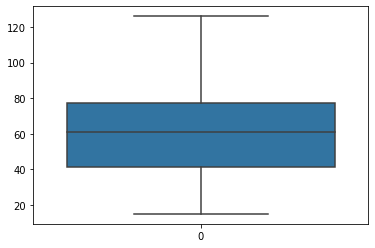

In [22]:
sns.boxplot(data['Annual Income (k$)'])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [24]:
Income = data['Annual Income (k$)'].values
Spend = data['Spending Score (1-100)'].values
X = np.array(list(zip(Income, Spend)))

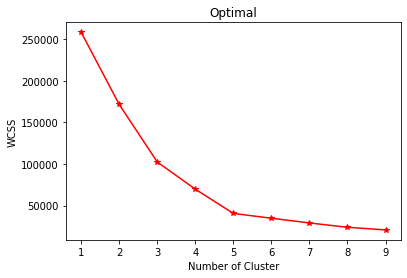

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1, 10), wcss, color='red', marker='*')
plt.title('Optimal')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


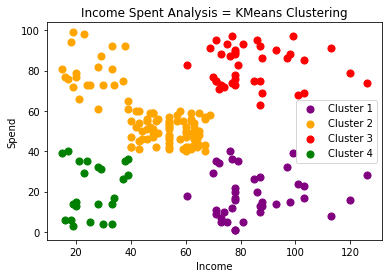

In [26]:
model = KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)
print(y_means)
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label="Cluster 1")
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label="Cluster 2")
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label="Cluster 3")
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label="Cluster 4")
#plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label="Cluster 5")
#plt.scatter(model.cluster_center_[:, 0], model.cluster_center_[:, 1], s=100, marker='s', color=c, lw=2)
plt.title('Income Spent Analysis = KMeans Clustering')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()

In [27]:
X = data.iloc[:, :2]
Y = y_means

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
x_train.shape, x_test.shape

((160, 2), (40, 2))

In [31]:
y_train

array([1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 3, 0, 1, 1, 0, 2, 2, 0, 2, 1, 3, 0, 1, 0, 1, 3, 2, 1, 1,
       0, 3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 3, 3, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0,
       1, 2, 3, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 3, 0,
       0, 2, 3, 0, 0, 0])